## Plot comparision of integrated 2D thickness and mass on beaches to illustrate trajectories of different spill volumes
- Oil: Bunker-C
- Location: Straight of Georgia
- Date: June 05, 2015

In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr

from midoss_utils import *

# set figure fontsizes
fs=12 
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

### load model output

In [2]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/volume_test')
# fname = results_path/f'Lagrangian_out_.nc'
# results = xr.open_dataset(fname)
# thick2d = results.Thickness_2D
# thick2d_sum = thick2d.sum(dim='time')

# This date includes 2 bunker-c cases
volume_str = ["0p01", "3", "200", "7000", "70000"]
volume_amounts = [0.01, 3, 300, 7000, 70000]
units = 'meters cubed'
fname = {}
results = {}
thick2d_sum = {}
for volume in volume_str:    
    fname[volume] = results_path/f'Lagrangian_out_{volume}.nc'
    results[volume] = xr.open_dataset(fname[volume])
    thick2d = results[volume].Thickness_2D
    thick2d_sum[volume] = thick2d.sum(dim='time')

## To start with, show "footprint" of oiling via time-integrated 2D thickness

<ipython-input-24-d0b648585888>:9: RuntimeWarning: divide by zero encountered in log
  mappable = ax.pcolormesh(np.log(thick2d_sum[volume].values), vmin = 0, vmax = np.log(5000), cmap = cm.cm.balance)
<ipython-input-24-d0b648585888>:9: RuntimeWarning: invalid value encountered in log
  mappable = ax.pcolormesh(np.log(thick2d_sum[volume].values), vmin = 0, vmax = np.log(5000), cmap = cm.cm.balance)


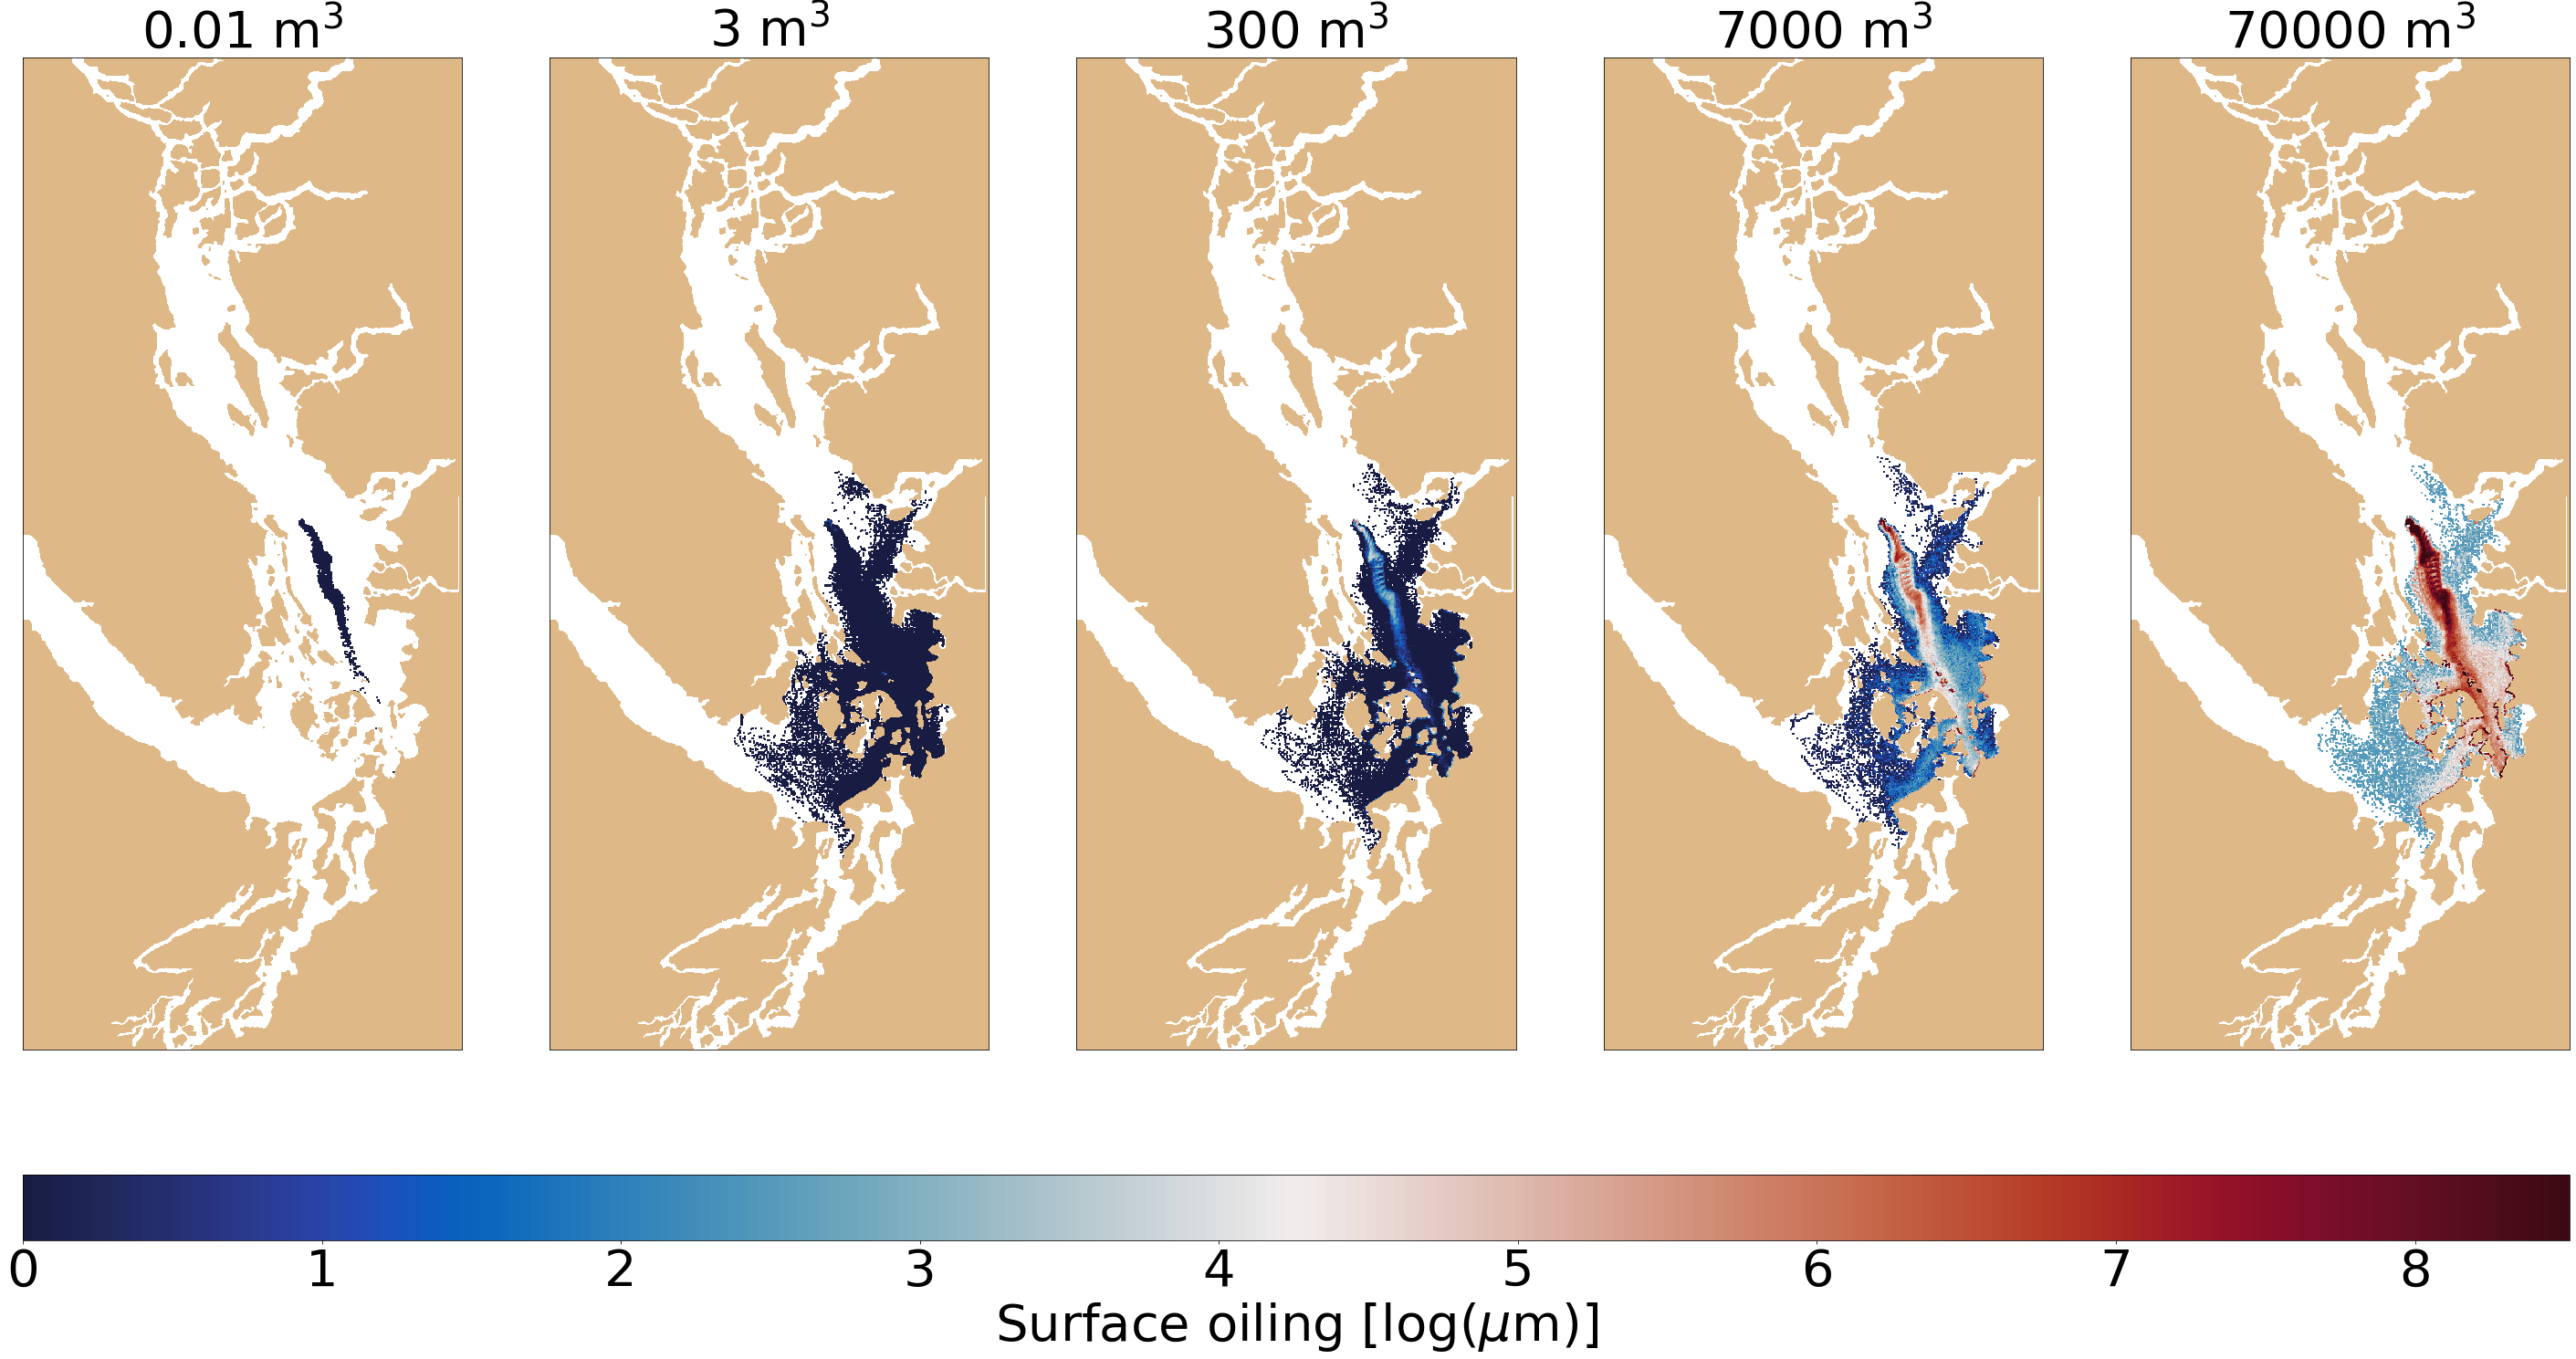

In [24]:
import cmocean as cm
from salishsea_tools import viz_tools
fs = 20
fig = plt.figure(figsize=(50,20))
plot_index = 1
for volume in volume_str:
    ax = fig.add_subplot(1,5,plot_index)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax.pcolormesh(np.log(thick2d_sum[volume].values), vmin = 0, vmax = np.log(5000), cmap = cm.cm.balance)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax.set_title(f'{volume_amounts[plot_index-1]} m$^3$', fontsize=56)
    ax.set_xticks([])
    ax.set_yticks([])
    if plot_index==3:
        ax_cbar = fig.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(mappable, cax=ax_cbar, orientation='horizontal')
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Surface oiling [log($\mu$m)]', fontsize = 56);
    plot_index += 1

## Next: Beaching Volume 

## Next: Mass balance

## Next: Surface Oiling by same spill volume but different oil-type